In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Adding Column names to the dataset

In [2]:
df=pd.read_csv('glass.csv',header=None)
df.columns=["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","TOG"]
df.drop("ID",axis=1,inplace=True)
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
118,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,2
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
164,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2


In [6]:
df.shape

(214, 10)

In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'TOG'], dtype='object')

In [8]:
df.dtypes

RI     float64
Na     float64
Mg     float64
Al     float64
Si     float64
K      float64
Ca     float64
Ba     float64
Fe     float64
TOG      int64
dtype: object

Checking the Null Values in the Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   TOG     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df.isnull().sum()

RI     0
Na     0
Mg     0
Al     0
Si     0
K      0
Ca     0
Ba     0
Fe     0
TOG    0
dtype: int64

<Axes: >

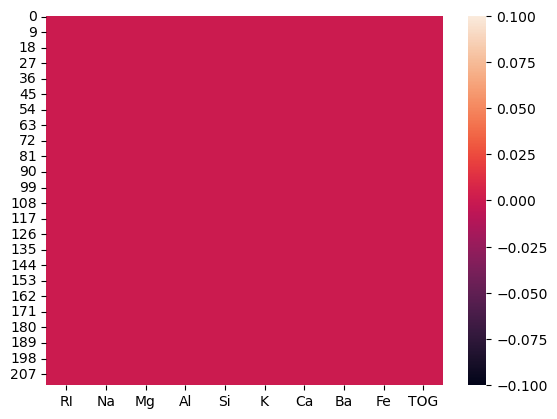

In [11]:
sns.heatmap(df.isnull())

Gathering the info of outliers present in the dataset

RI        Axes(0.125,0.712609;0.168478x0.167391)
Na     Axes(0.327174,0.712609;0.168478x0.167391)
Mg     Axes(0.529348,0.712609;0.168478x0.167391)
Al     Axes(0.731522,0.712609;0.168478x0.167391)
Si        Axes(0.125,0.511739;0.168478x0.167391)
K      Axes(0.327174,0.511739;0.168478x0.167391)
Ca     Axes(0.529348,0.511739;0.168478x0.167391)
Ba     Axes(0.731522,0.511739;0.168478x0.167391)
Fe         Axes(0.125,0.31087;0.168478x0.167391)
TOG     Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

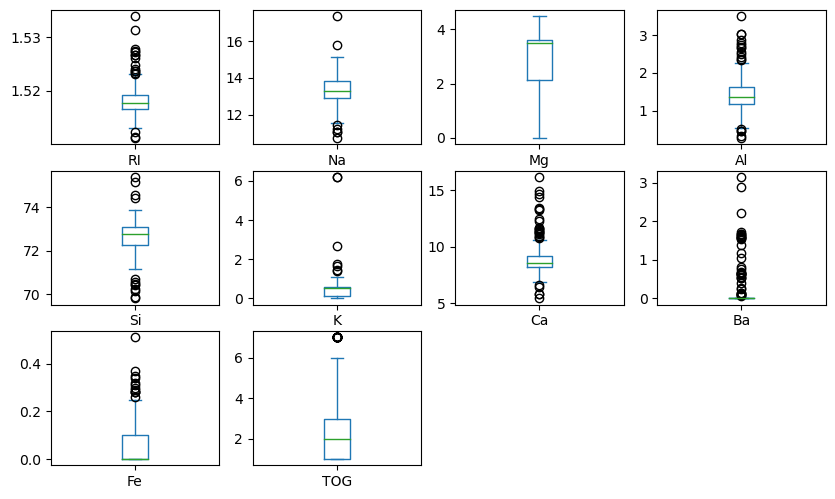

In [12]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,8))

Checking Correlation

In [13]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
TOG,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

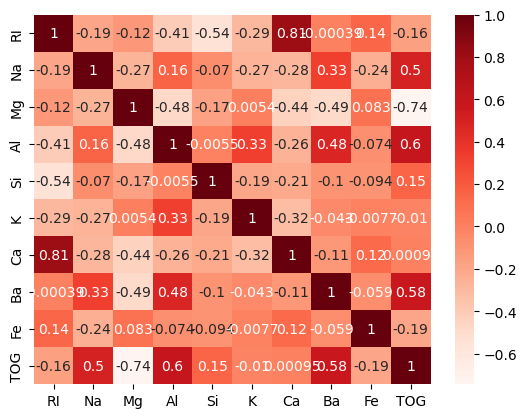

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'TOG'}>, <Axes: >, <Axes: >]],
      dtype=object)

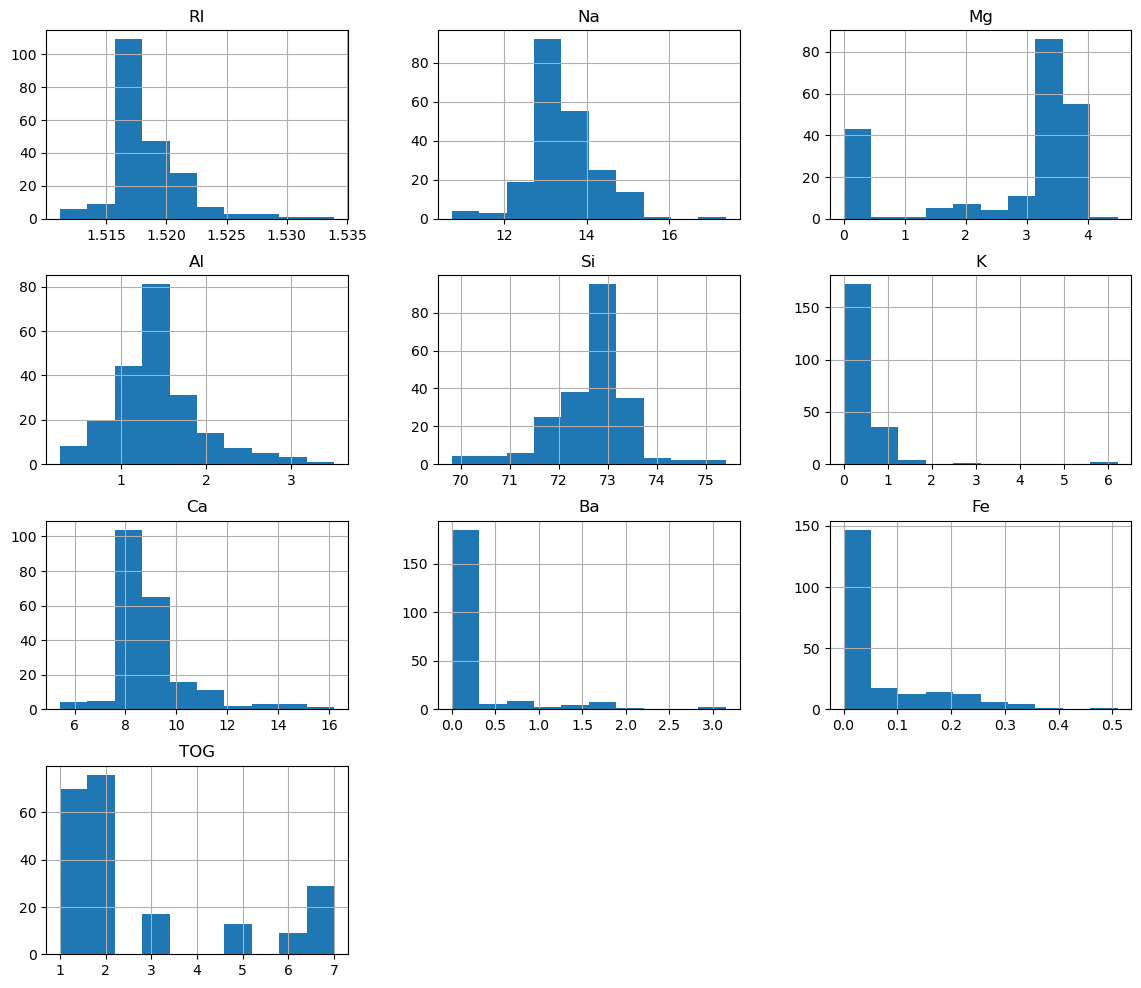

In [15]:
df.hist(figsize=(14,12))

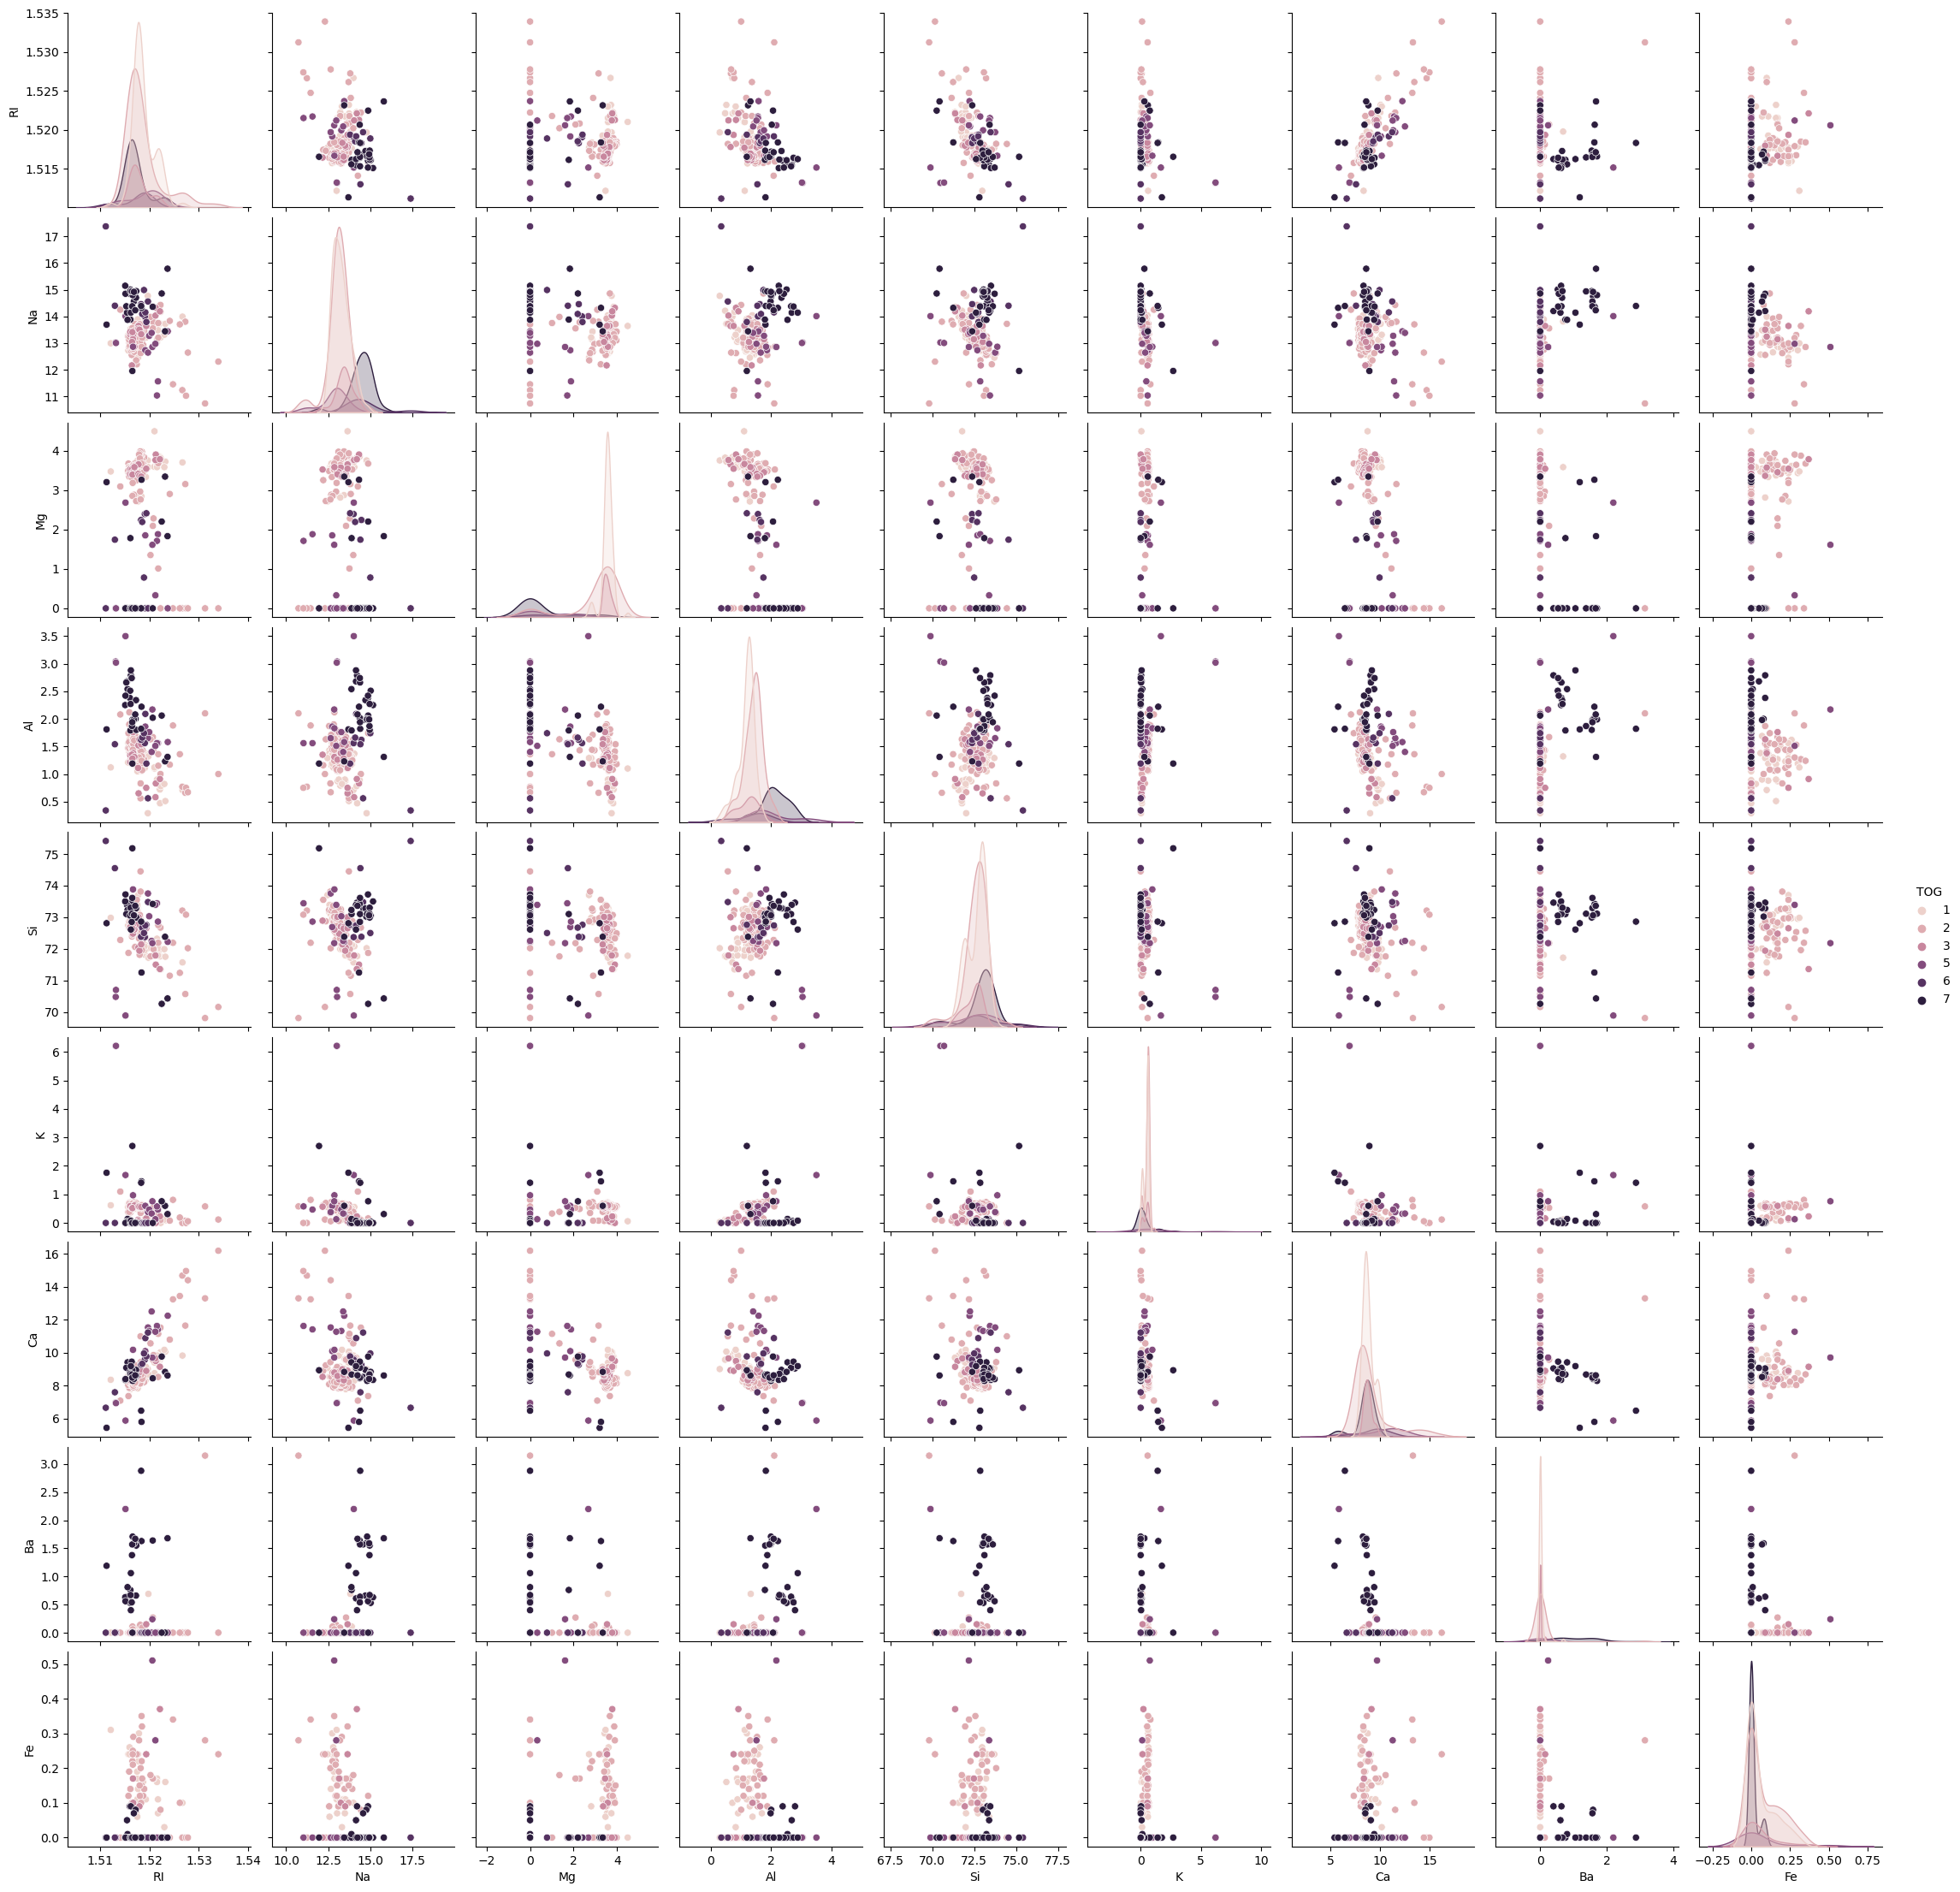

In [17]:
sns.pairplot(df,hue='TOG')

Distribution of glass types

In [18]:
df['TOG'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: TOG, dtype: int64

<Axes: xlabel='TOG', ylabel='count'>

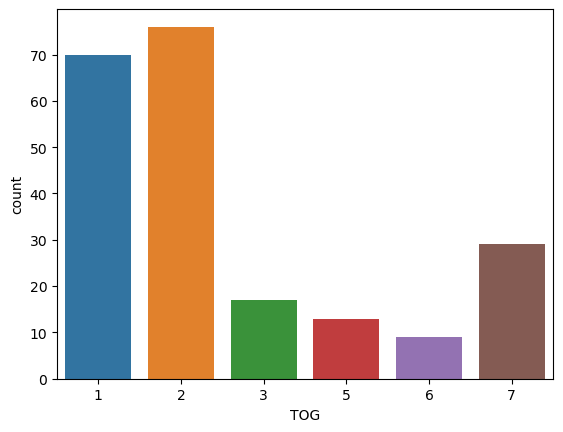

In [19]:
sns.countplot(x='TOG',data=df)

In [20]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Analysing using Different Models

In [21]:
x=df.iloc[:,0:9]
y=df.iloc[:,9]

In [22]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: TOG, Length: 214, dtype: int64

Test and Training Phase

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


Using Linear Regression

In [29]:
new=LinearRegression()
new.fit(x_train,y_train)

LinearRegression()

In [30]:
new.score(x_test,y_test)

0.8557278202618005

Using Random Forest Classifier

In [35]:
new1=RandomForestClassifier()
new1.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
new1.score(x_test,y_test)

0.7906976744186046

Using Decision Tree Classifier

In [37]:
new2=DecisionTreeClassifier()
new2.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
new2.score(x_test,y_test)

0.7441860465116279

Results of these models we get to know about the accuracy of these as 85.57 for Linear Regression,79.06 for Random Forest Classifier and 74.41 for Decision Tree Classifier